<a href="https://colab.research.google.com/github/RachanaKC/Data-Science-Project/blob/main/Rachana_Insurance_data_visualization_project_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries


In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read and Understand Data

In [ ]:
#Reading the csv file insurance.csv
df = pd.read_csv('insurance.csv')
insured=df.copy()

In [ ]:
# inspect data, print top 5
insured.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
# bottom 5 rows:
insured.tail(5)

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
insured.info()    #it give information about datatype of different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
insured.shape
#get the size of dataframe
print ("Rows     : " , insured.shape[0])
print ("Columns  : " , insured.shape[1])


Rows     :  1338
Columns  :  7


In [ ]:
insured.isnull().sum().values.sum()

0

In [ ]:
insured = insured.dropna()

In [ ]:
insured.shape

(1338, 7)

In [ ]:
print ("\nValues : \n", insured.values)
print ("\nFeatures : \n", list(insured.columns))



Values : 
 [[19 'female' 27.9 ... 'yes' 'southwest' 16884.92]
 [18 'male' 33.8 ... 'no' 'southeast' 1725.55]
 [28 'male' 33.0 ... 'no' 'southeast' 4449.46]
 ...
 [18 'female' 36.9 ... 'no' 'southeast' 1629.83]
 [21 'female' 25.8 ... 'no' 'southwest' 2007.95]
 [61 'female' 29.1 ... 'yes' 'northwest' 29141.36]]

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']


In [ ]:
insured.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [ ]:
#changing object dtype to category  to save memory
insured['sex']=insured['sex'].astype("category")
insured['smoker']=insured['smoker'].astype("category")
insured['region']=insured['region'].astype("category")


In [ ]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [ ]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
# get counts of unique observations for each category variable
list_col=  insured.select_dtypes(['category']).columns
list_col


Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
insured['sex'].value_counts()

,count
sex,
male,676
female,662


In [ ]:
insured['region'].value_counts()

,count
region,
southeast,364
northwest,325
southwest,325
northeast,324


In [ ]:
dict(insured['region'].value_counts())

{'southeast': 364, 'northwest': 325, 'southwest': 325, 'northeast': 324}

In [ ]:
insured['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64


# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
# # Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

In [ ]:
len(insured[insured['sex'] == 'female'])

662

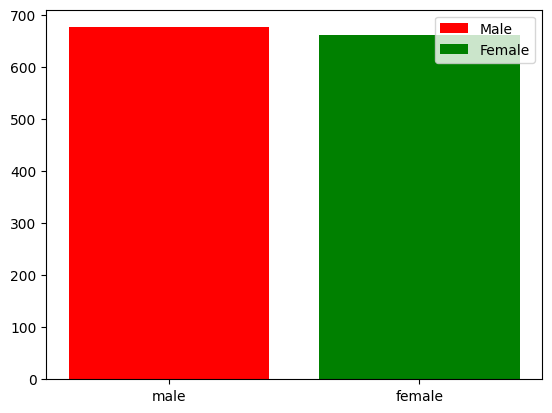

In [ ]:
no_of_male = len(insured[insured['sex'] == 'male'])
no_of_female = len(insured[insured['sex'] == 'female'])

plt.bar(['male','female'],[no_of_male,no_of_female],color = ['r','g'],label = ['Male','Female'])
plt.legend()
plt.show()

{'male': 676, 'female': 662}


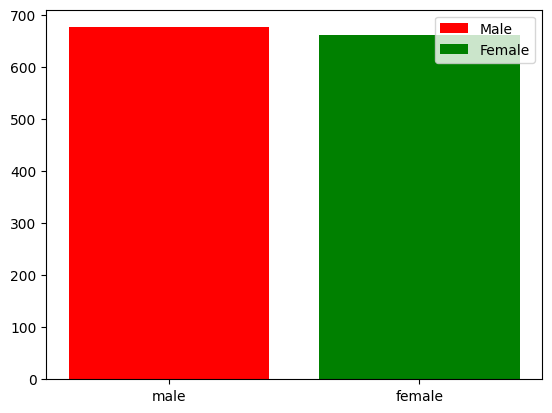

In [ ]:
plot_data = dict(insured['sex'].value_counts())
print(plot_data)
plt.bar(['male','female'],[plot_data['male'],plot_data['female']],color = ['r','g'],label = ['Male','Female'])
plt.legend()
plt.show()

<Axes: xlabel='sex'>

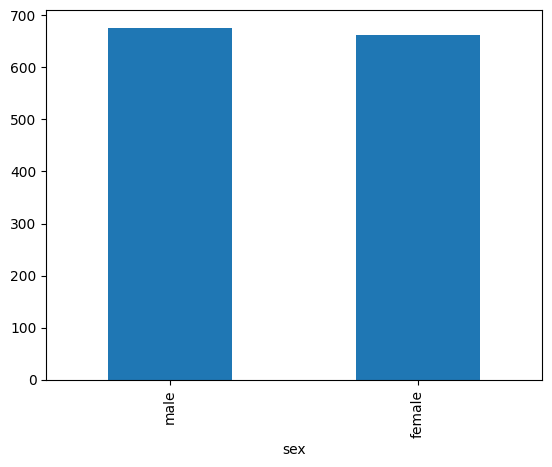

In [ ]:
insured['sex'].value_counts().plot.bar()

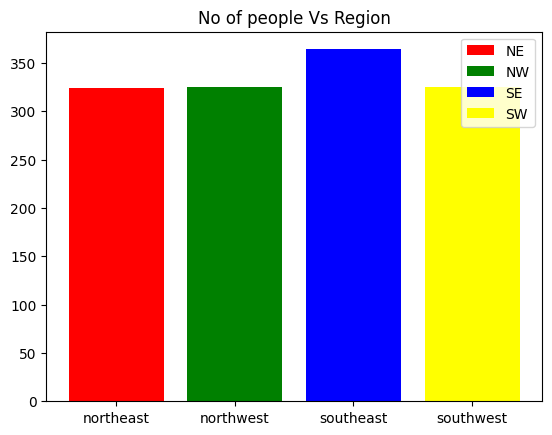

In [ ]:
#Alternet
#for Region
no_of_ne = len(insured[insured['region'] == "northeast"])
no_of_nw = len(insured[insured['region'] == "northwest"])
no_of_se = len(insured[insured['region'] == 'southeast'])
no_of_sw = len(insured[insured['region'] == 'southwest'])

plt.bar(["northeast","northwest","southeast","southwest"],[no_of_ne,no_of_nw,no_of_se,no_of_sw], color = ['red','green','blue','yellow'], label=["NE","NW","SE","SW"])
plt.title('No of people Vs Region')
plt.legend()
plt.show()

{'southeast': 364, 'northwest': 325, 'southwest': 325, 'northeast': 324}


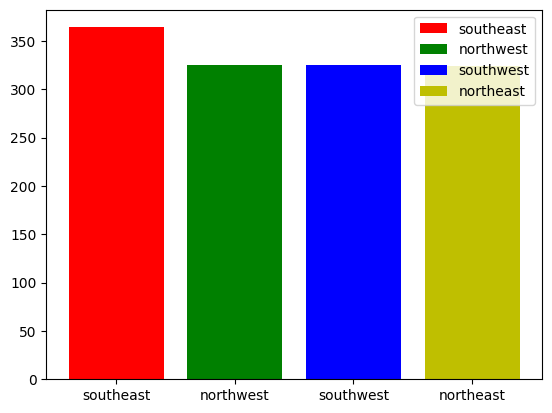

In [ ]:
plot_data = dict(insured['region'].value_counts())
print(plot_data)
plt.bar(plot_data.keys(),plot_data.values(),color = ['r','g','b','y'],label = plot_data.keys())
plt.legend()
plt.show()


<Axes: xlabel='region'>

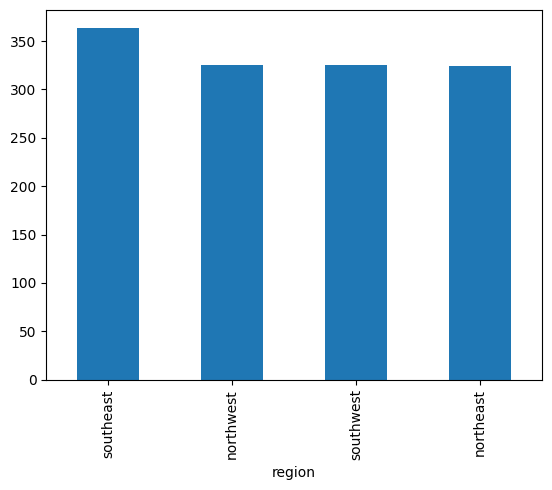

In [ ]:
insured['region'].value_counts().plot.bar()

<Axes: ylabel='count'>

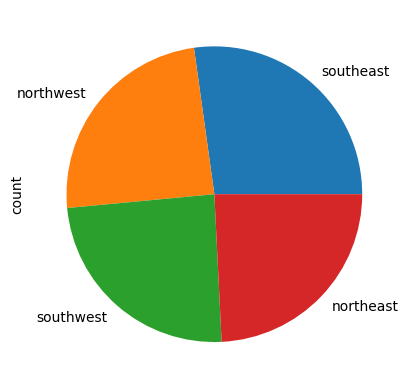

In [ ]:
insured['region'].value_counts().plot.pie()

In [ ]:
len(set(insured['smoker']))

2

<Axes: xlabel='smoker'>

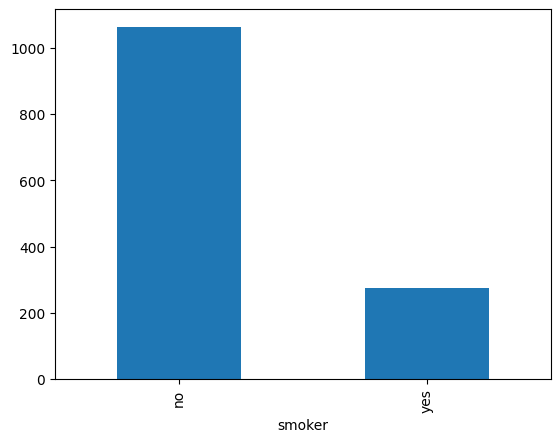

In [ ]:
insured['smoker'].value_counts().plot.bar()

In [ ]:
data = {}
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
  values = list(insured[list_col[i]].value_counts())
  subcategory = list(insured[list_col[i]].value_counts().index)
  # data['x'] = values
  data[list_col[i]] = [subcategory,values]
  # print(subcategory,values)

print(data)

{'sex': [['male', 'female'], [676, 662]], 'smoker': [['no', 'yes'], [1064, 274]], 'region': [['southeast', 'northwest', 'southwest', 'northeast'], [364, 325, 325, 324]]}


In [ ]:
# Bar Graph

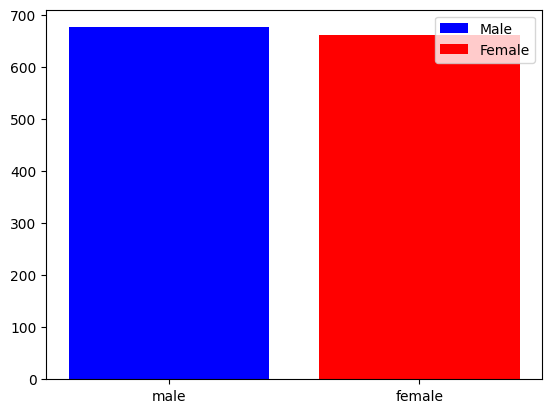

In [ ]:
plt.bar(data['sex'][0],data['sex'][1],label=['Male','Female'],
        color = ['b','r'])
plt.legend()
plt.show()

[['southeast', 'northwest', 'southwest', 'northeast'], [364, 325, 325, 324]]


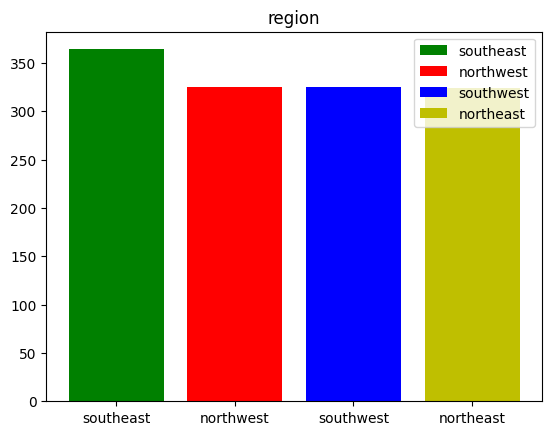

In [ ]:
#Alternate
print(data['region'])
plt.bar(data['region'][0],data['region'][1],
        label=data['region'][0],
        color = ['g','r','b','y'])
plt.title('region')
plt.legend()
plt.show()

## Bivariate & Multivariate Analysis

In [ ]:
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
corr_insured = insured[['age','bmi','expenses']]

In [ ]:
corr_insured.corr()

,age,bmi,expenses
age,1.000000,0.109341,0.299008
bmi,0.109341,1.000000,0.198576
expenses,0.299008,0.198576,1.000000


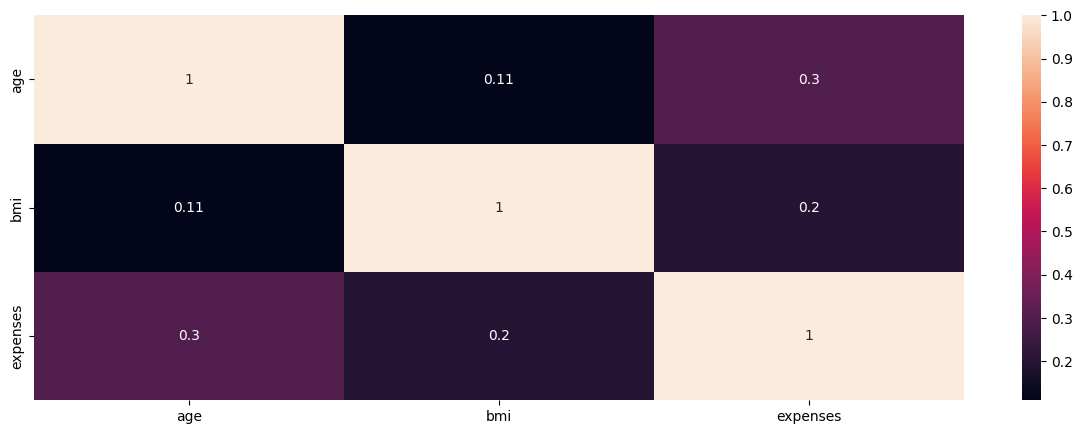

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_insured.corr(),annot=True)
plt.show()

<Figure size 500x500 with 0 Axes>

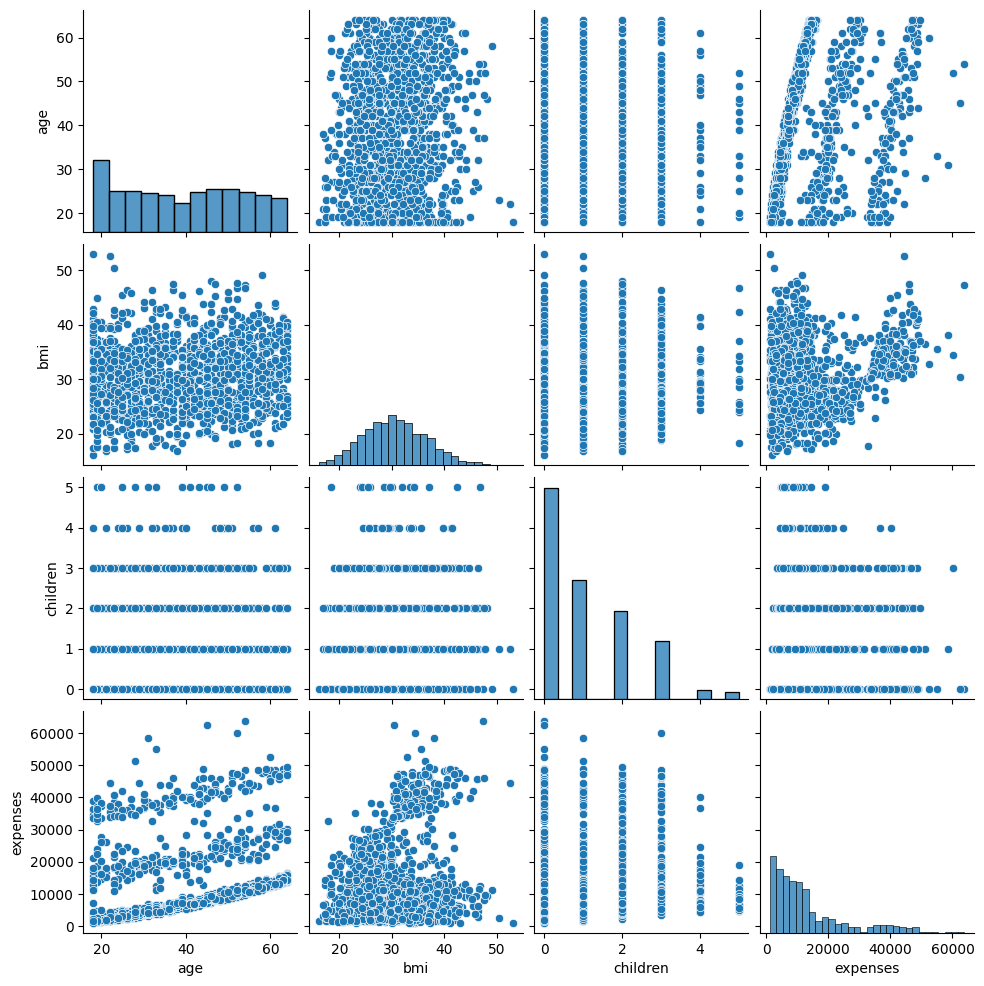

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(data=insured)
plt.show()

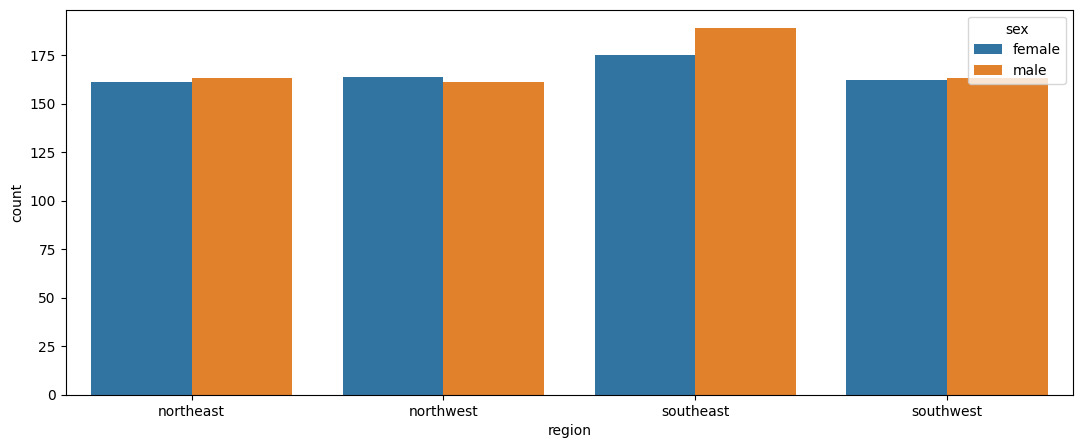

In [ ]:
#Gender count plot
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='sex',data=insured)
# bar_perc(ax,insured['Education Level'])

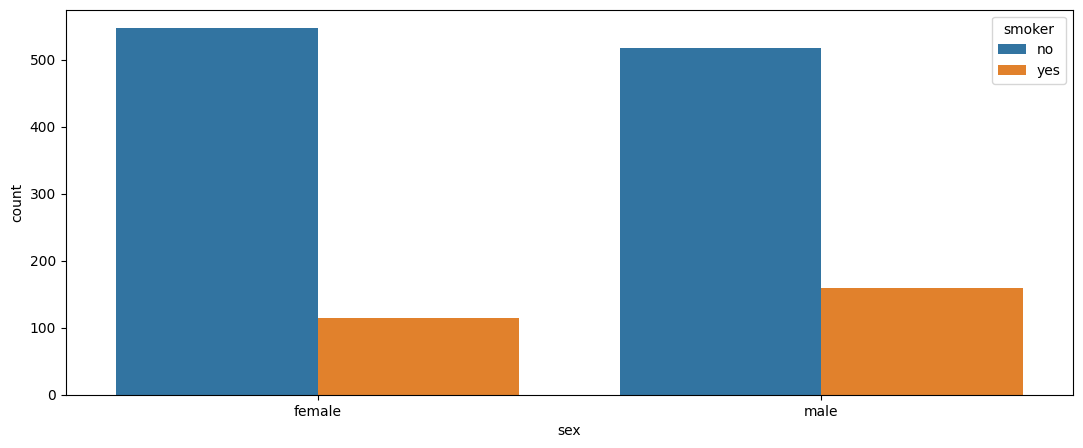

In [ ]:
#Sex vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='sex',hue='smoker',data=insured)


In [ ]:
# GROUP BY

In [ ]:
insured.groupby(insured['sex']).expenses.mean()    #GROUP BY BY Gender

,expenses
sex,
female,12569.578897
male,13956.751420


<Axes: xlabel='sex'>

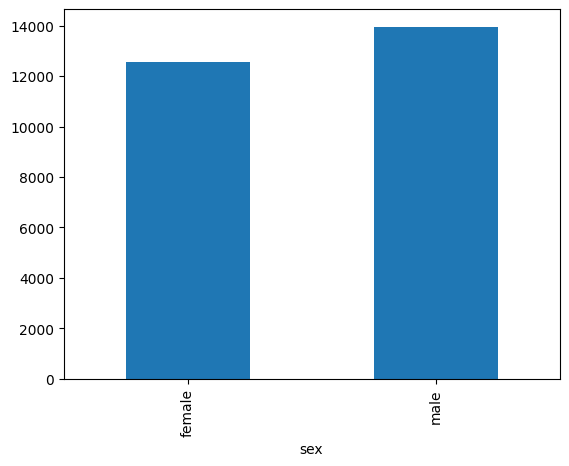

In [ ]:
insured.groupby(insured['sex']).expenses.mean().plot.bar()    #GROUP BY BY Gender

In [ ]:
insured.groupby(insured['region']).expenses.mean()      #GROUP BY BY Education Level

,expenses
region,
northeast,13406.384691
northwest,12417.575169
southeast,14735.411538
southwest,12346.937908


In [ ]:
insured.groupby(insured['smoker']).expenses.mean()

,expenses
smoker,
no,8434.268449
yes,32050.231971


In [ ]:
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
insured.groupby(insured['region']).bmi.mean()

,bmi
region,
northeast,29.176235
northwest,29.201846
southeast,33.359341
southwest,30.596615


In [ ]:
plot_data = dict(insured.groupby(insured['region']).expenses.mean())
plot_key = list(plot_data.keys())
plot_value = list(plot_data.values())
print(plot_key)
print(plot_value)
print(plot_data)

['northeast', 'northwest', 'southeast', 'southwest']
[13406.384691358024, 12417.57516923077, 14735.411538461538, 12346.937907692307]
{'northeast': 13406.384691358024, 'northwest': 12417.57516923077, 'southeast': 14735.411538461538, 'southwest': 12346.937907692307}


<Axes: xlabel='region'>

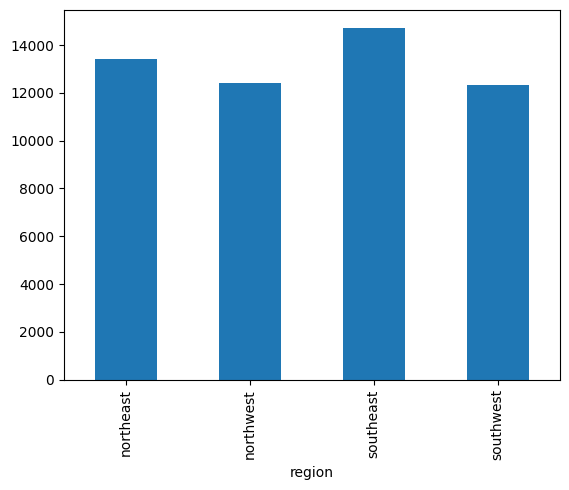

In [ ]:
insured.groupby(insured['region']).expenses.mean().plot.bar()

<Axes: xlabel='region'>

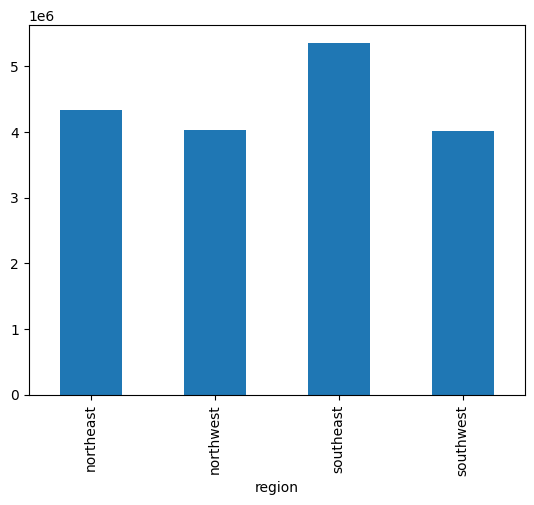

In [ ]:
insured.groupby(insured['region']).expenses.sum().plot.bar()

[Text(0.5, 1.0, 'Sex Vs Expenses')]

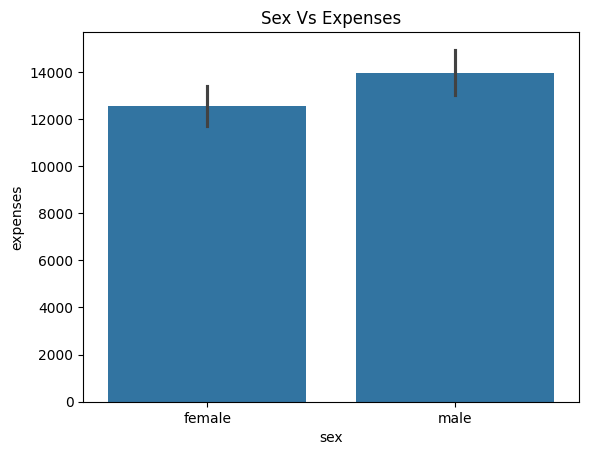

In [ ]:
_#Plot of Sex and Expenses
sns.barplot(x=insured.sex,y=insured.expenses).set(title='Sex Vs Expenses')

[Text(0.5, 1.0, 'Region Vs Expenses')]

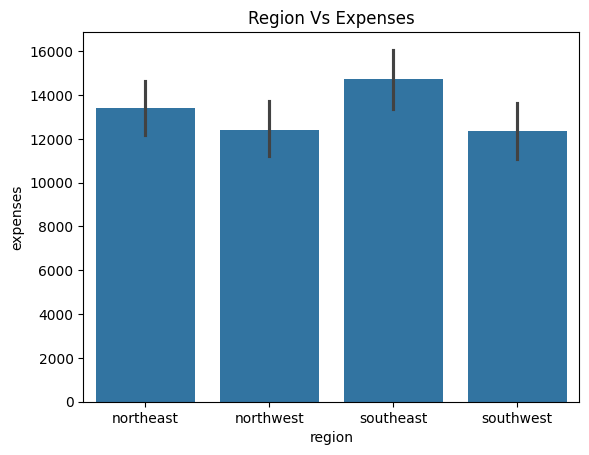

In [ ]:
sns.barplot(x=insured['region'],y=insured['expenses']).set(title='Region Vs Expenses')

#multivariate


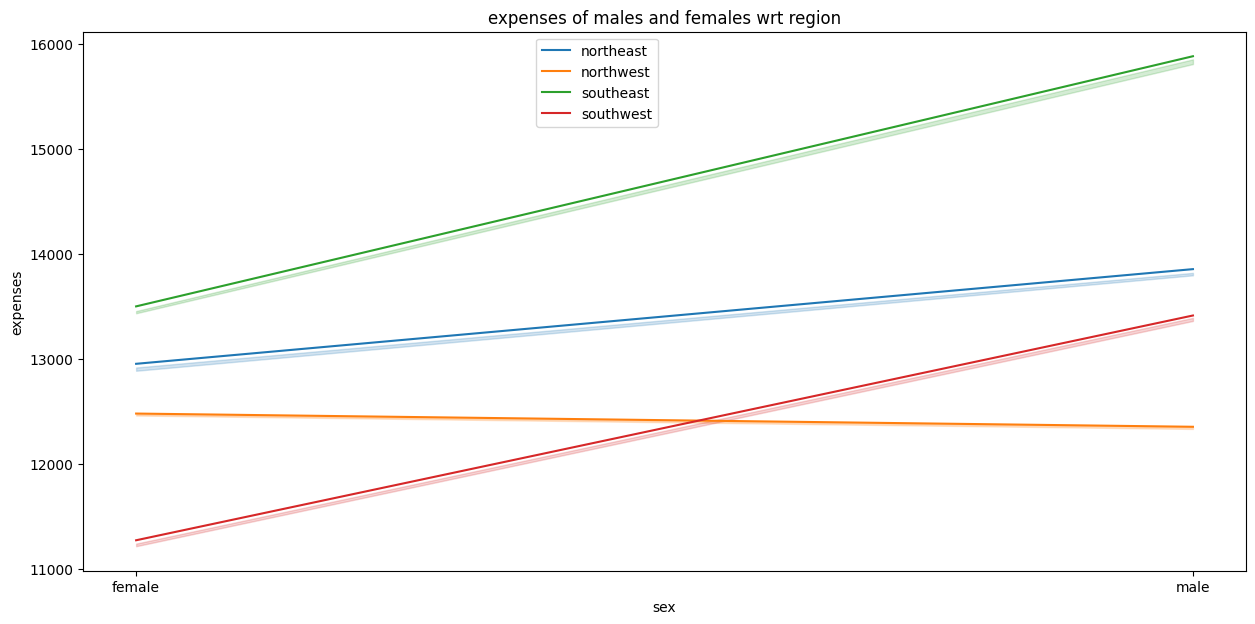

In [ ]:
#lineplot
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["sex"], y =insured["expenses"],hue=insured["region"],ci=1).set(title= 'expenses of males and females wrt region')
plt.legend(bbox_to_anchor=(0.5, 1))
plt.show()

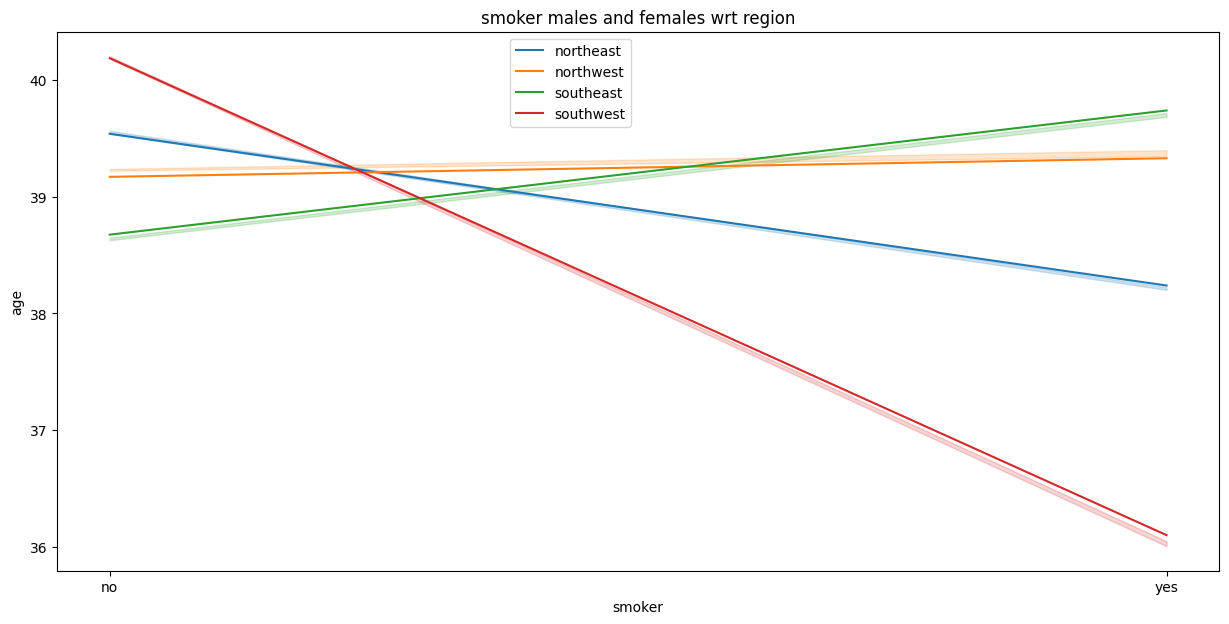

In [ ]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["smoker"], y =insured["age"],hue=insured["region"],ci=1).set(title= 'smoker males and females wrt region')
plt.legend(bbox_to_anchor=(0.5, 1))
plt.show()

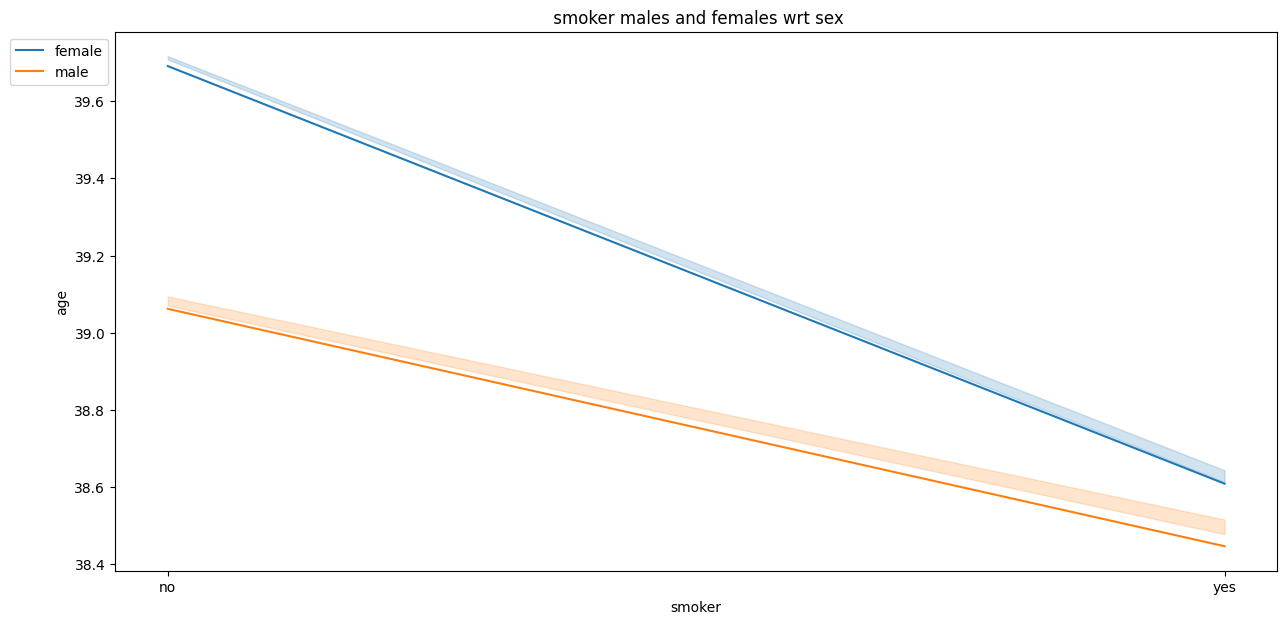

In [ ]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["smoker"], y =insured["age"],hue=insured["sex"],ci=1).set(title= ' smoker males and females wrt sex')
plt.legend(bbox_to_anchor=(0, 1))
plt.show()

#Cross tab

In [ ]:
#Cross tab
region_sex_expenses =pd.crosstab(index=insured['region'], columns=insured.sex  , values = insured.expenses, aggfunc='mean')
region_sex_expenses


sex,female,male
region,,
northeast,12953.203106,13854.005767
northwest,12479.870244,12354.119317
southeast,13499.669257,15879.617354
southwest,11274.411667,13412.884233


In [ ]:
sex_region_expenses=pd.crosstab(index=insured.sex, columns=insured['region']  , values=insured.expenses,aggfunc='sum')
sex_region_expenses

region,northeast,northwest,southeast,southwest
sex,,,,
female,2085465.70,2046698.72,2362442.12,1826454.69
male,2258202.94,1989013.21,3001247.68,2186300.13


In [ ]:
# plot directly from dataframe

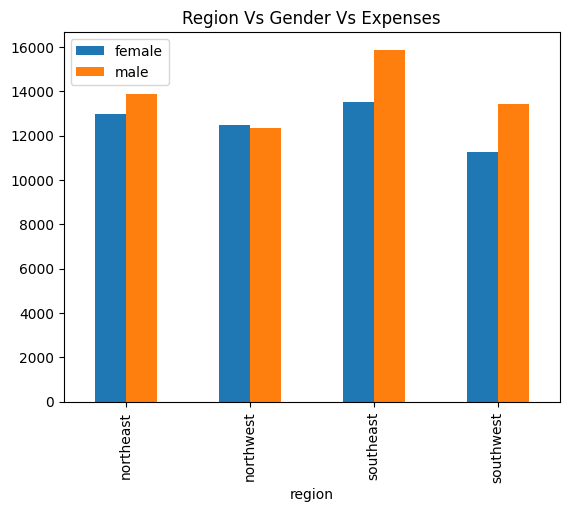

In [ ]:
region_sex_expenses.plot(kind='bar',title="Region Vs Gender Vs Expenses")
plt.legend(loc='upper left')
plt.show()

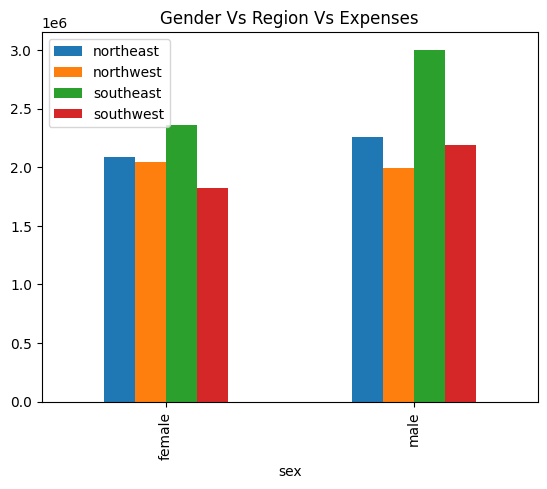

In [ ]:
sex_region_expenses.plot(kind='bar',title="Gender Vs Region Vs Expenses")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# converting quantitative data to qualitative
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
#creating groups of age
category = pd.cut(insured.age,bins=[10,15,20,25,30,35,40,45,50,55,60],labels=['10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60'])
category

,age
0,15-20
1,15-20
2,25-30
3,30-35
4,30-35
...,...
1333,45-50
1334,15-20
1335,15-20
1336,20-25


In [ ]:
insured.insert(1,'AgeGroup',category)

In [ ]:
insured

,age,AgeGroup,sex,bmi,children,smoker,region,expenses
0,19,15-20,female,27.9,0,yes,southwest,16884.92
1,18,15-20,male,33.8,1,no,southeast,1725.55
2,28,25-30,male,33.0,3,no,southeast,4449.46
3,33,30-35,male,22.7,0,no,northwest,21984.47
4,32,30-35,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...
1333,50,45-50,male,31.0,3,no,northwest,10600.55
1334,18,15-20,female,31.9,0,no,northeast,2205.98
1335,18,15-20,female,36.9,0,no,southeast,1629.83
1336,21,20-25,female,25.8,0,no,southwest,2007.95


In [ ]:
age_group = insured.groupby(insured.AgeGroup).expenses.mean()
age_group

,expenses
AgeGroup,
10-15,NaN
15-20,8713.482771
20-25,9529.919643
25-30,10086.132754
30-35,10929.364692
35-40,12366.023071
40-45,14538.651241
45-50,15013.603472
50-55,16988.005500


In [ ]:
category1=pd.cut(insured['bmi'],bins=[20,30,40,50,60],labels=['20-30','30-40','40-50','50-60'])
insured.insert(6,'bmi_group',category1)

In [ ]:
insured.head()

,age,AgeGroup,sex,bmi,children,smoker,bmi_group,region,expenses
0,19,15-20,female,27.9,0,yes,20-30,southwest,16884.92
1,18,15-20,male,33.8,1,no,30-40,southeast,1725.55
2,28,25-30,male,33.0,3,no,30-40,southeast,4449.46
3,33,30-35,male,22.7,0,no,20-30,northwest,21984.47
4,32,30-35,male,28.9,0,no,20-30,northwest,3866.86


In [ ]:
bmi_group= insured.groupby(insured.bmi_group).expenses.mean()
bmi_group

,expenses
bmi_group,
20-30,10851.513233
30-40,15406.049687
40-50,16810.194886
50-60,16034.306667


In [ ]:
insured['bmi'].value_counts()

,count
bmi,
27.6,17
33.3,17
28.9,16
32.3,15
29.8,14
...,...
39.0,1
40.8,1
20.3,1


<Axes: title={'center': 'Age bins vs Avg expenses'}, xlabel='AgeGroup'>

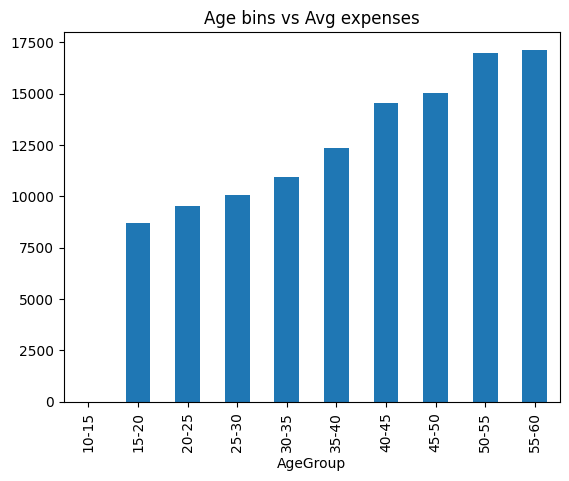

In [ ]:
age_group.plot(kind='bar',title="Age bins vs Avg expenses")


In [ ]:
bmi_bin_cat = insured.groupby(insured.bmi_group).expenses.mean()
bmi_bin_cat

,expenses
bmi_group,
20-30,10851.513233
30-40,15406.049687
40-50,16810.194886
50-60,16034.306667


<Axes: title={'center': 'bmi_bins vs Avg expenses'}, xlabel='bmi_group'>

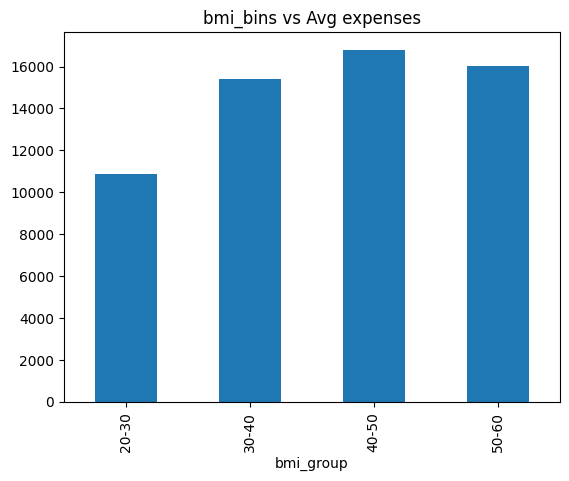

In [ ]:
bmi_bin_cat.plot(kind='bar',title="bmi_bins vs Avg expenses")


In [ ]:
#multi variate data analysis
insured.groupby(['sex','region','bmi_group']).expenses.mean()

sex     region     bmi_group
female  northeast  20-30        11151.690137
                   30-40        15352.306522
                   40-50        12464.906250
                   50-60                 NaN
        northwest  20-30        11316.330843
                   30-40        13933.138986
                   40-50        11089.238000
                   50-60                 NaN
        southeast  20-30        11640.325833
                   30-40        13927.556386
                   40-50        18417.574000
                   50-60                 NaN
        southwest  20-30         9387.454103
                   30-40        13658.255211
                   40-50        13041.000000
                   50-60                 NaN
male    northeast  20-30        10963.441124
                   30-40        18151.757458
                   40-50        19847.115714
                   50-60                 NaN
        northwest  20-30        10949.113855
                   30-40        14248.451940
                   40-50        23330.146667
                   50-60                 NaN
        southeast  20-30        11117.047059
                   30-40        17285.013333
                   40-50        18935.140000
                   50-60        16034.306667
        southwest  20-30        10341.287794
                   30-40        16280.250460
                   40-50         8274.750000
                   50-60                 NaN
Name: expenses, dtype: float64

In [ ]:
insured.groupby(['sex','region','bmi_group']).expenses.mean().unstack()

bmi_group                20-30         30-40         40-50         50-60
sex    region                                                           
female northeast  11151.690137  15352.306522  12464.906250           NaN
       northwest  11316.330843  13933.138986  11089.238000           NaN
       southeast  11640.325833  13927.556386  18417.574000           NaN
       southwest   9387.454103  13658.255211  13041.000000           NaN
male   northeast  10963.441124  18151.757458  19847.115714           NaN
       northwest  10949.113855  14248.451940  23330.146667           NaN
       southeast  11117.047059  17285.013333  18935.140000  16034.306667
       southwest  10341.287794  16280.250460   8274.750000           NaN

<Axes: title={'center': 'bmi_bins vs Avg expenses'}, xlabel='sex,region'>

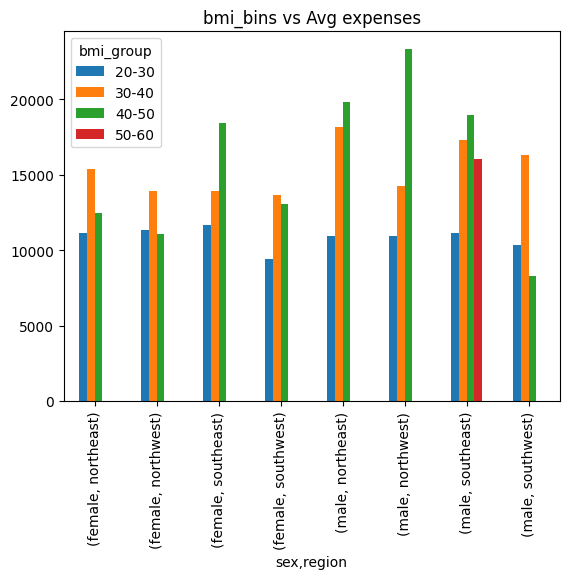

In [ ]:
insured.groupby(['sex','region','bmi_group']).expenses.mean().unstack().plot(kind='bar',title="bmi_bins vs Avg expenses")

<Axes: title={'center': 'bmi_bins vs Avg expenses'}, xlabel='region,sex'>

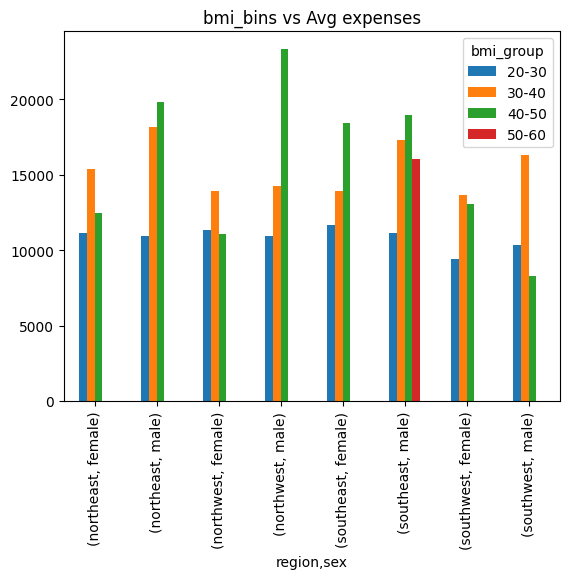

In [ ]:
insured.groupby(['region','sex','bmi_group']).expenses.mean().unstack().plot(kind='bar',title="bmi_bins vs Avg expenses")

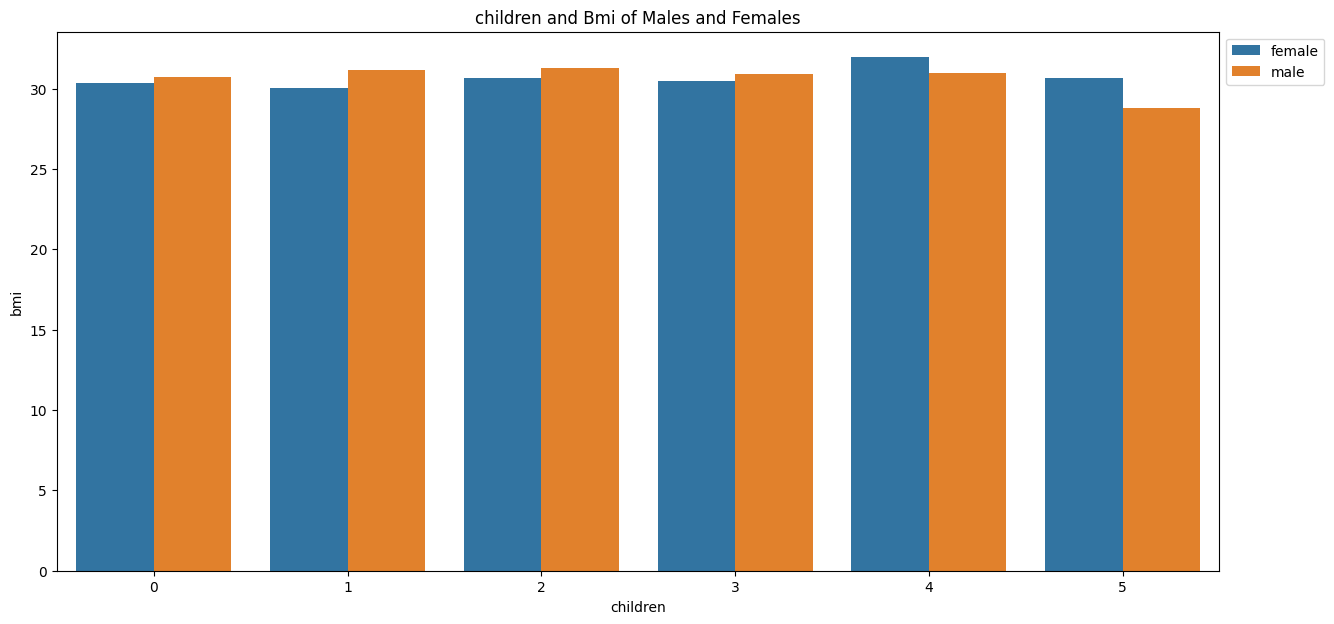

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=insured["children"],y=insured["bmi"],hue=insured['sex'],ci=0).set(title= 'children and Bmi of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

[Text(0.5, 1.0, 'Region vs Bmi vs Gender')]

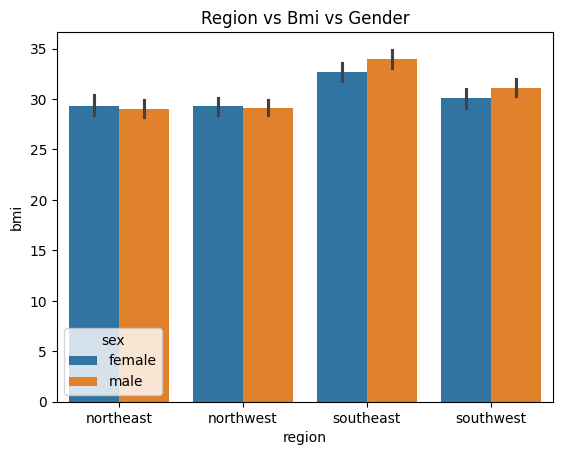

In [ ]:
sns.barplot(x='region',y='bmi',hue='sex',data=insured).set(title="Region vs Bmi vs Gender" )

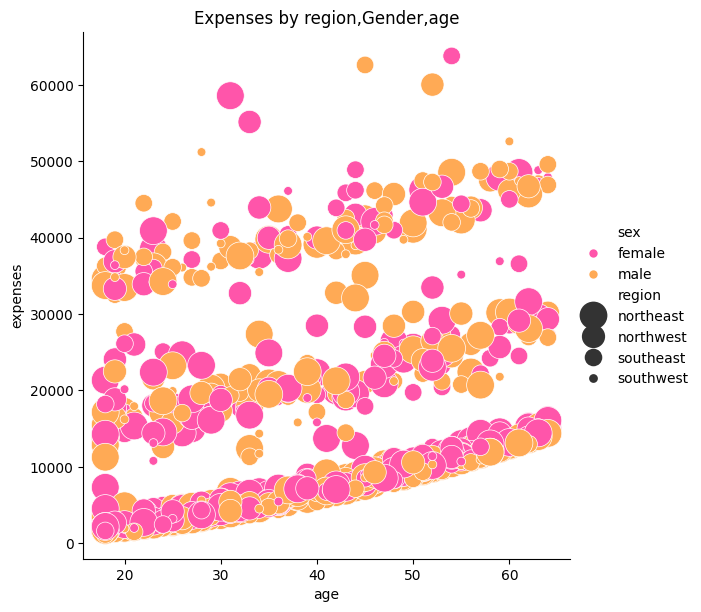

In [ ]:
sns.relplot(x=insured['age'], y=insured["expenses"], hue=insured['sex'], size=  insured['region'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Expenses by region,Gender,age');

In [ ]:
insured

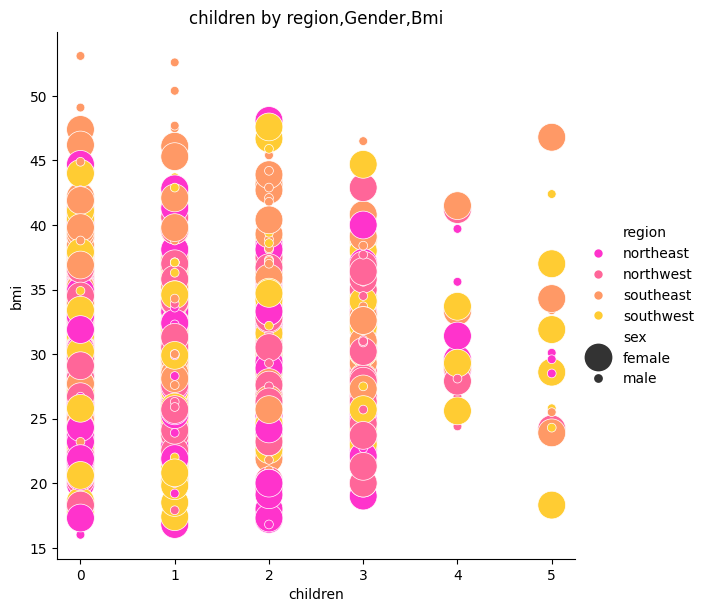

In [ ]:
sns.relplot(x=insured['children'], y=insured['bmi'], hue=insured['region'], size=  insured['sex'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='children by region,Gender,Bmi');

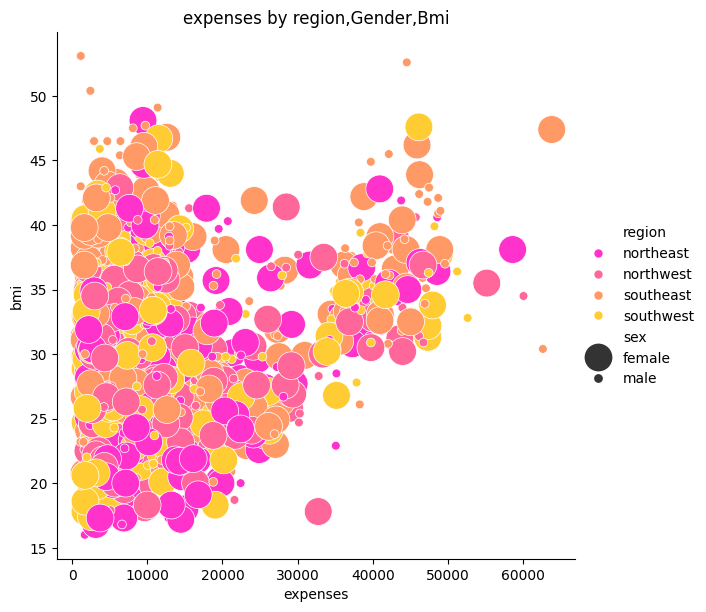

In [ ]:
sns.relplot(x=insured['expenses'], y=insured['bmi'], hue=insured['region'], size=  insured['sex'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='expenses by region,Gender,Bmi');